In [1]:
#Imports
import matplotlib.pyplot as  plt
import pandas as pd
import numpy as np
from sklearn.utils.validation import column_or_1d
from sklearn.feature_selection import VarianceThreshold
from google.colab import drive
import numpy as np                     # Llibreria matemÃ tica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mÃ©s facilment el dataset digits
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn
from sklearn.model_selection import cross_val_score  
%matplotlib inline
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, make_scorer, confusion_matrix

In [2]:
from IPython.display import display, HTML

def reportClassesDataframe(report):
    report = [x.split(' ') for x in report.split('\n')]
    header = ['Class Name']+[x for x in report[0] if x!='']
    values = []
    for row in report[1:-5]:
        row = [value for value in row if value!='']
        if row!=[]:
            values.append(row)
    df = pd.DataFrame(data = values, columns = header)
    return df

def reportAccuracyDF(report):
  report = [x.split('      ') for x in report.split('\n')]
  values = []
  report[6].pop(2)
  df = pd.DataFrame(report[6:9])
  return df

def prettyReport(report):
    df = reportClassesDataframe(report)
    display(HTML(df.to_html(index=False,justify="center")))
    df2 = reportAccuracyDF(report)
    
    print("\n")
    display(HTML(df2.to_html( header=False,index=False,justify="center")))
    df
    df2
    return

In [3]:
#Function that shows the confusion matrix with a pretty Layout
def  prettyConfusionMatrix(confmat):
  fig, ax = plt.subplots(figsize=(2.5, 2.5))
  ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
  for i in range(confmat.shape[0]):
      for j in range(confmat.shape[1]):
          ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=7)

  plt.xlabel('Predicted label')
  plt.ylabel('True label')

  plt.tight_layout()
  plt.savefig('ConMatrix.png', dpi=600)
  plt.show()
  return


def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score


In [18]:
#Read num_rows_to_read first rows
# num_rows_to_read = 5000
# X = pd.read_csv("train_values_Prep.csv",nrows=num_rows_to_read)
# y = pd.read_csv("train_labels_Prep_Bal.csv",nrows=num_rows_to_read)
# z = pd.concat([X, y],axis=1)
# g = z.groupby('damage_grade')



#drive.mount("/content/drive")

%matplotlib inline 



#link train_labelsB
linkLabels = "/content/drive/MyDrive/Colab/train_labels_Prep.csv"

#link train_labels
linkValues = "/content/drive/MyDrive/Colab/train_values_Prep.csv"


#Read num_rows_to_read first rows
#num_rows_to_read = 40000
X = pd.read_csv(linkValues)

y = pd.read_csv(linkLabels)

y_np = y.to_numpy()
y_np = y_np.ravel()

(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y_np, test_size=.3, stratify = y,random_state=1)


#SVM

#Kernel Polinòmic

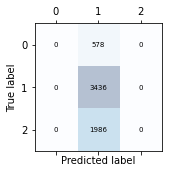

Confusion matrix on test set:
 None

Accuracy on test set:  0.5726666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Class Name,precision,recall,f1-score,support
1,0.00,0.00,0.00,578
2,0.57,1.00,0.73,3436
3,0.00,0.00,0.00,1986


accuracy,,,0.57,6000
macro avg,0.19,0.33,0.24,6000
weighted avg,0.33,0.57,0.42,6000


None


In [20]:
knc = SVC(kernel='poly', degree=2)
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",prettyConfusionMatrix(confusion_matrix(y_test, pred)))
print("\nAccuracy on test set: ",accuracy_score(y_test, pred))
print(prettyReport(classification_report(y_test, pred)))

##Grid Search

In [21]:
Cs = np.logspace(-3, 1, num=5, base=10.0)

param_grid = {'C': Cs}
grid_search = GridSearchCV(SVC(kernel='poly',degree =3) , param_grid, cv=10)
grid_search.fit(X_train,y_train)

scores = grid_search.cv_results_['mean_test_score']

plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_

cvacc = cross_val_score(SVC(kernel='poly',degree =3,C=parval['C']) , X=X_train,  y=y_train, cv=10, scoring='accuracy')
print('Acc. 10-fold cross on train data= ', cvacc.mean())


knc = SVC(kernel='poly',degree =3,C=parval['C']) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
prettyConfusionsMatrix(confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",accuracy_score(y_test, pred))
print("\nBest combination of parameters found: ",parval)
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])
prettyReport(classification_report(y_test, pred))

KeyboardInterrupt: ignored

In [ ]:
# Let's apply the best combination of parameters found to the test set

knc = SVC(kernel='poly', C=parval['C'], degree=3) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)


prettyConfusionMatrix(confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",accuracy_score(y_test, pred))
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])
prettyReport(classification_report(y_test, pred))

Confusion matrix on test set:
 [[  0 147   0]
 [  0 852   0]
 [  0 501   0]]

Accuracy on test set:  0.568

Number of supports:  2812 ( 3702 of them have slacks)
Prop. of supports:  0.8034285714285714
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       147
           2       0.57      1.00      0.72       852
           3       0.00      0.00      0.00       501

    accuracy                           0.57      1500
   macro avg       0.19      0.33      0.24      1500
weighted avg       0.32      0.57      0.41      1500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
